Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 tasks      | elapsed:    4.7s
[Parallel(n_jobs=5)]: Done 400 out of 400 | elapsed:    7.7s finished


Best estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='distance')
KNN with default params accuracy:  0.7115196078431373
KNN with tuned hyper paramaters:  0.7896844362745098


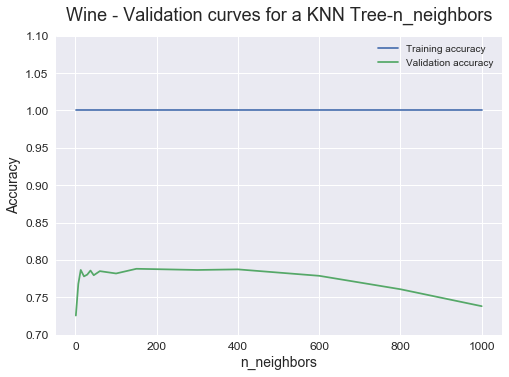

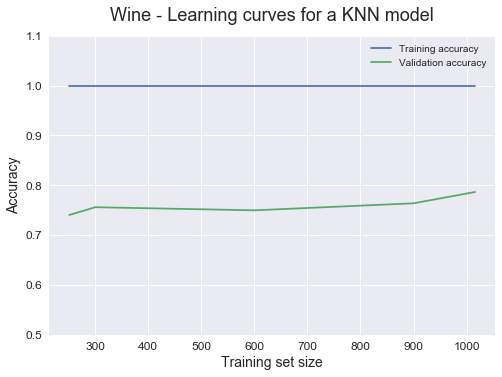

In [1]:
###########DT##################
#wine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

#load data
df = pd.read_csv (r'./data/wine.csv')

#preprocessing
# convert target to binary
df.loc[df.quality =='bad', "quality"] = 0 #bad wine
df.loc[df.quality == 'good', "quality"] = 1 #good wine
#get the target
y = df.pop('quality')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)



#grid search to find best paramteres
params = {'n_neighbors': [1,3,5,7,9,11,13,15,19,22,25,30,35,40,45,50,55,60,70,80]
          , 'weights': ['uniform','distance']
          , 'metric' : ['euclidean','manhattan']
        }
grid_search_cv = GridSearchCV(KNeighborsClassifier()
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);


#print best estimators
print("Best estimators: ", grid_search_cv.best_estimator_)

#model with default features
print("KNN with default params accuracy: ", cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean())
print("KNN with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean())


#plot validation curve
#1. n_neighbors

n_neighbors_range = [1,7,13,21,29,37,45,60,100,150,300,400,600,800,1000]
train_scores, valid_scores = validation_curve(KNeighborsClassifier(metric='manhattan',weights ='distance',leaf_size=30),
                                              X_train,
                                              y_train,
                                              param_name = "n_neighbors",
                                              param_range = n_neighbors_range,
                                             cv=5)

plt.style.use('seaborn')
plt.plot(n_neighbors_range, train_scores.mean(axis=1), label = 'Training accuracy')
plt.plot(n_neighbors_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('n_neighbors', fontsize = 14)
plt.title('Wine - Validation curves for a KNN Tree-n_neighbors', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.7,1.1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#learning curve

train_sizes = [251, 300, 600, 900, 1016]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Wine - Learning curves for a KNN model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()


In [2]:
#based on VC curve tuning
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='distance'
                          )

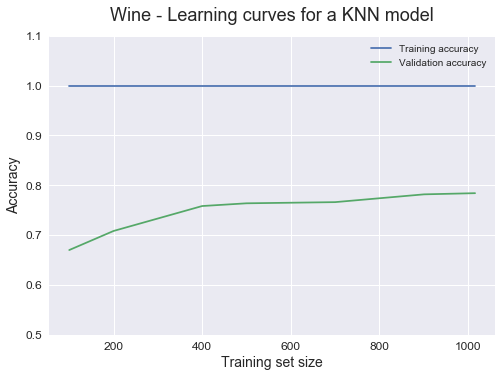

In [3]:
#learning curve

train_sizes = [100,200,400,500,700,901, 1016]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = knn, #grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Wine - Learning curves for a KNN model', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.5,1.1)
plt.show()


In [4]:
#model with default features
print("KNN with default params accuracy: ", cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean())
print("KNN with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean())
print("KNN with LC hyper paramaters: ", cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean())

KNN with default params accuracy:  0.7115196078431373
KNN with tuned hyper paramaters:  0.7896844362745098
KNN with LC hyper paramaters:  0.781859681372549


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 400 out of 400 | elapsed:    1.8s finished


Best estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
KNN with default params F1:  0.7447316875326063

 --------------------
KNN with tuned hyper paramaters:  0.8146690905159083


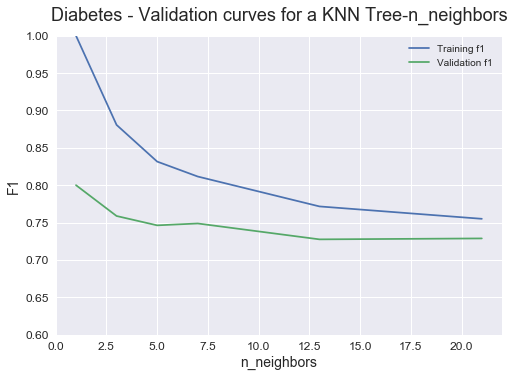

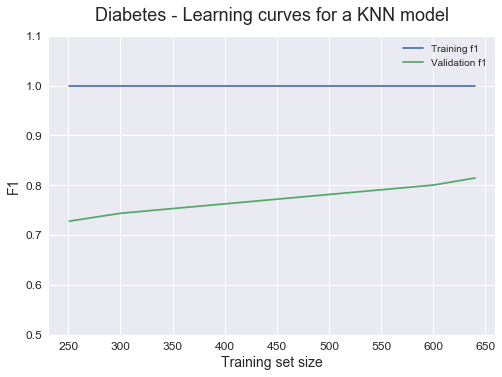

In [5]:
#diabetes
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

#load data
df = pd.read_csv (r'./data/diabetes.csv')

#preprocessing
# convert target to binary
df.loc[df["class"] =='tested_negative', "class"] = 0
df.loc[df["class"] == 'tested_positive', "class"] = 1

#get the target
y = df.pop('class')
#scale features
X_scaled = preprocessing.scale(df)

oversample = BorderlineSMOTE(random_state=42)
X_scaled, y = oversample.fit_resample(X_scaled, y)


#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

#decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#plot tree(hide for now)
#tree.plot_tree(clf);

#save tree as pdf
#diabetes_data = tree.export_graphviz(clf, out_file=None)
#graph = graphviz.Source(diabetes_data)
#graph.render("diabetes")

#grid search to find best paramteres
params = {'n_neighbors': [1,3,5,7,9,11,13,15,19,22,25,30,35,40,45,50,55,60,70,80]
          , 'weights': ['uniform','distance']
          , 'metric' : ['euclidean','manhattan']
        }
grid_search_cv = GridSearchCV(KNeighborsClassifier()
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);


#print best estimators
print("Best estimators: ", grid_search_cv.best_estimator_)

#model with default features
print("KNN with default params F1: ", cross_val_score(DecisionTreeClassifier(random_state=42), X_train, y_train, cv=5, scoring='f1').mean())

print('\n', '-' * 20) # separator

#model with perf tuned hyperparameters
print("KNN with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())

#plot validation curve
#1. n_neighbors

n_neighbors_range = [1,3,5,7,13,21]
train_scores, valid_scores = validation_curve(KNeighborsClassifier(),
                                              X_train,
                                              y_train,
                                              param_name = "n_neighbors",
                                              param_range = n_neighbors_range,
                                             cv=5)

plt.style.use('seaborn')
plt.plot(n_neighbors_range, train_scores.mean(axis=1), label = 'Training f1')
plt.plot(n_neighbors_range, valid_scores.mean(axis=1), label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('n_neighbors', fontsize = 14)
plt.title('Diabetes - Validation curves for a KNN Tree-n_neighbors', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.6,1.0)
plt.show()

#learning curve

train_sizes = [251, 300, 600, 640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curves for a KNN model', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.5,1.1)
plt.show()


In [6]:
#based on VC curve tuning
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

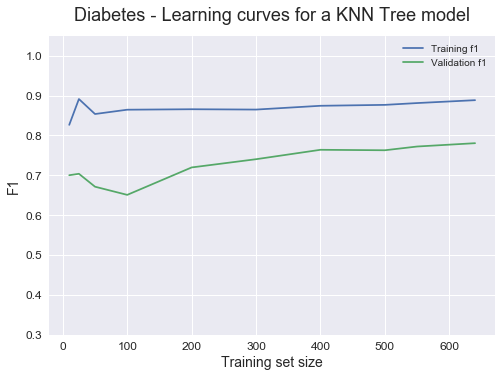

In [7]:
#learning curve based on VC

train_sizes = [10,25,50,100,200,300,400, 500,550,640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = knn,#grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               random_state=42,
               #shuffle = True,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curves for a KNN Tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.3,1.05)
plt.show()

In [8]:
#model with default features
print("KNN with default params accuracy: ", cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='f1').mean())

print('\n', '-' * 20) # separator

#model with perf tuned hyperparameters
print("KNN with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())

#model with LC tuned hyperparameters
print("KNN with LC hyper paramaters: ", cross_val_score(knn, X_train, y_train, cv=5, scoring='f1').mean())

KNN with default params accuracy:  0.7712168126701104

 --------------------
KNN with tuned hyper paramaters:  0.8146690905159083
KNN with LC hyper paramaters:  0.7806693695021868
